# ライブラリ読み込み

In [1]:
import pandas as pd
import numpy as np
from scipy import signal
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.style.use('ggplot') #グラフのスタイル
plt.rcParams['figure.figsize'] = [12, 9] # グラフサイズ設定

# データ読み込み

In [3]:
train_df = pd.read_csv('../data/train_data.csv')
test_df = pd.read_csv('../data/test_data.csv')
submission_df = pd.read_csv('../data/submission.csv')

# 前処理

In [4]:
from my_utils import preprocessing

train_preprocessed = preprocessing.preprocess(train_df, mode='train', drop=True)
test_preprocessed = preprocessing.preprocess(test_df, mode='test', drop=True)

In [5]:
train_preprocessed.head()

,id,time,year,month,day,weekday,day_of_year,highest,lowest,rain,...,bento3,bento4,tild1,tild2,men1,men2,men3,men4,men5,men6
0,1,2021-04-11,2021,4,11,6,101,21.9,12.4,0.0,...,70,27,12,12,57,30,41,38,37,35
1,2,2021-04-12,2021,4,12,0,102,25.9,13.9,0.0,...,23,9,5,8,19,9,13,26,4,16
2,3,2021-04-13,2021,4,13,1,103,20.9,11.9,0.0,...,19,6,4,9,23,9,11,33,4,13
3,4,2021-04-14,2021,4,14,2,104,18.8,11.4,0.0,...,74,28,15,17,55,35,46,46,51,46
4,5,2021-04-15,2021,4,15,3,105,22.1,13.5,19.0,...,69,26,4,9,54,33,39,40,41,40


# 移動平均法を利用した分解（加法モデルを仮定）

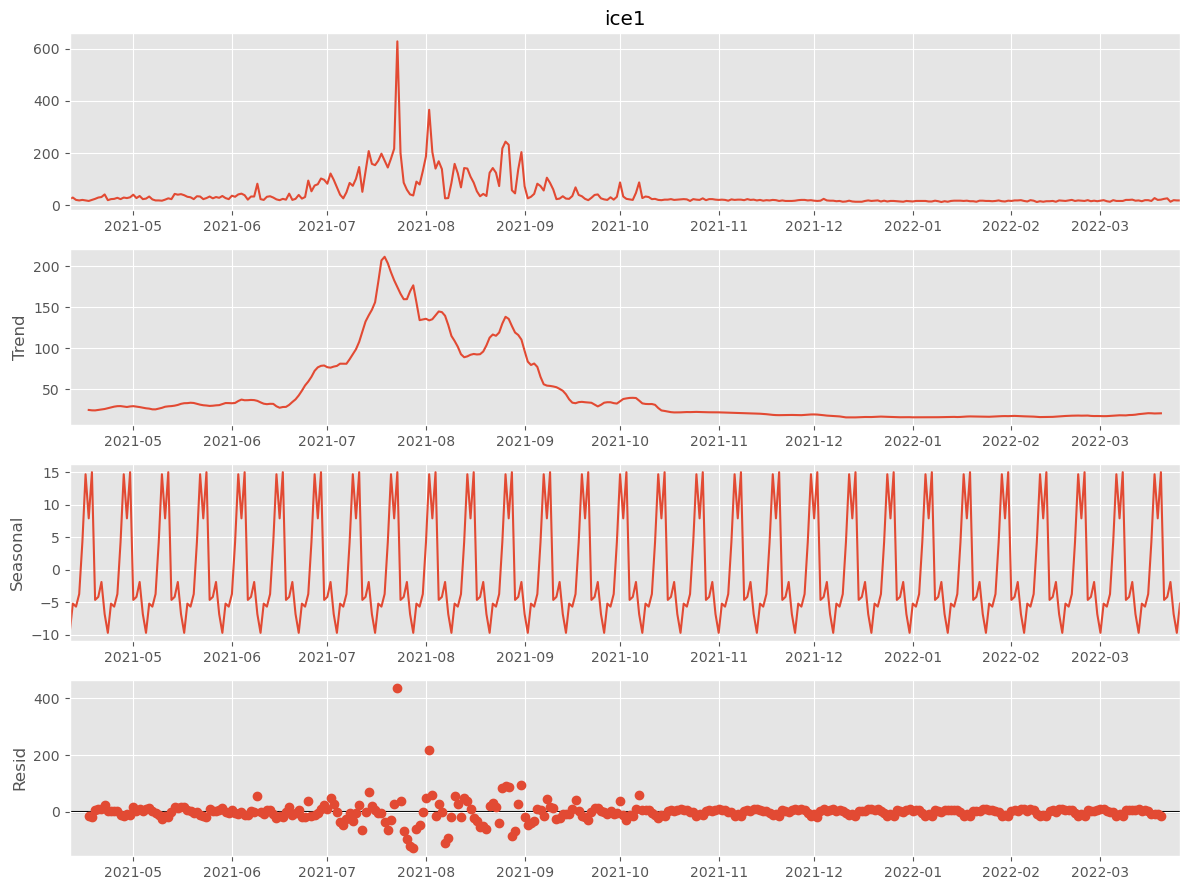

In [15]:
train = train_preprocessed.set_index('time')
ice_1 = train['ice1']
result = seasonal_decompose(ice_1, model='additive', period=12)
result.plot()
plt.show()